In [1]:
#Can we predict the interest rate based on a persons credit score(FICO score) and loan amount?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
loans_data = pd.read_csv('loansData.csv')

In [4]:
loans_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [5]:
loans_data['Interest.Rate'] = loans_data['Interest.Rate'].apply(lambda x: x.split('%')[0]).astype(float)

In [6]:
loans_data['Interest.Rate']

81174      8.90
99592     12.12
80059     21.98
15825      9.99
33182     11.71
62403     15.31
48808      7.90
22090     17.14
76404     14.33
15867      6.91
94971     19.72
36911     14.27
41200     21.67
83869      8.90
53853      7.62
21399     15.65
62127     12.12
23446     10.37
44987      9.76
17977      9.99
86099     21.98
99483     19.05
28798     17.99
24168     11.99
10356     16.82
46027      7.90
2238      14.42
65278     15.31
4227       8.59
50182      7.90
          ...  
84265     22.95
80231      7.90
49533     22.45
102514    15.13
78618     18.75
86953     14.09
80129     14.09
85216      8.90
38247     11.71
91245     15.80
53041      6.03
63051      6.62
14446      7.51
68628     14.33
98758     10.16
13070     10.75
45836     17.27
52330     19.99
48243     15.81
63256     18.75
42124     11.71
78043      7.62
925       10.08
74047     23.28
49957     14.65
23735     16.77
65882     14.09
55610     13.99
38576     12.42
3116      13.79
Name: Interest.Rate, Len

In [7]:
loans_data['Loan.Length'] = loans_data['Loan.Length'].apply(lambda x: x.split(' ')[0]).astype(int)


In [8]:
loans_data['Loan.Length']

81174     36
99592     36
80059     60
15825     36
33182     36
62403     36
48808     36
22090     60
76404     36
15867     36
94971     36
36911     36
41200     60
83869     36
53853     36
21399     60
62127     36
23446     60
44987     36
17977     60
86099     36
99483     60
28798     60
24168     36
10356     60
46027     36
2238      36
65278     36
4227      36
50182     36
          ..
84265     60
80231     36
49533     60
102514    36
78618     36
86953     36
80129     36
85216     36
38247     36
91245     60
53041     36
63051     36
14446     36
68628     36
98758     36
13070     36
45836     36
52330     36
48243     36
63256     36
42124     36
78043     36
925       36
74047     60
49957     36
23735     60
65882     60
55610     36
38576     36
3116      36
Name: Loan.Length, Length: 2500, dtype: int32

In [9]:
loans_data['FICO.Range'] = loans_data['FICO.Range'].apply(lambda x : x.split('-')[0]).astype(int)

In [10]:
loans_data['FICO.Range']

81174     735
99592     715
80059     690
15825     695
33182     695
62403     670
48808     720
22090     705
76404     685
15867     715
94971     670
36911     665
41200     670
83869     735
53853     725
21399     730
62127     695
23446     740
44987     730
17977     760
86099     665
99483     695
28798     665
24168     695
10356     670
46027     705
2238      675
65278     675
4227      765
50182     760
         ... 
84265     665
80231     770
49533     685
102514    650
78618     660
86953     675
80129     675
85216     730
38247     725
91245     680
53041     760
63051     810
14446     720
68628     675
98758     690
13070     765
45836     665
52330     660
48243     685
63256     670
42124     710
78043     720
925       710
74047     675
49957     685
23735     705
65882     740
55610     680
38576     675
3116      670
Name: FICO.Range, Length: 2500, dtype: int32

In [11]:
loans_data.dtypes

Amount.Requested                    int64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                         int32
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                          int32
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

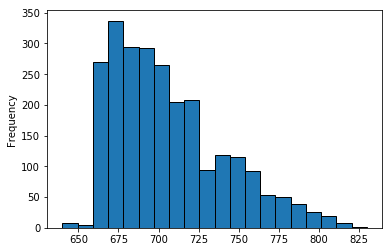

In [12]:
loans_data['FICO.Range'].plot(kind='hist', bins = 20, edgecolor='black')

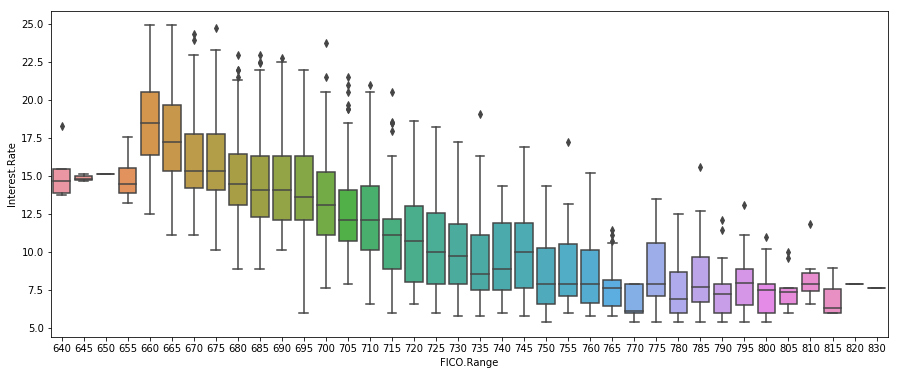

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(y='Interest.Rate', x='FICO.Range', data = loans_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D47FF96048>,
      dtype=object)

<Figure size 864x720 with 0 Axes>

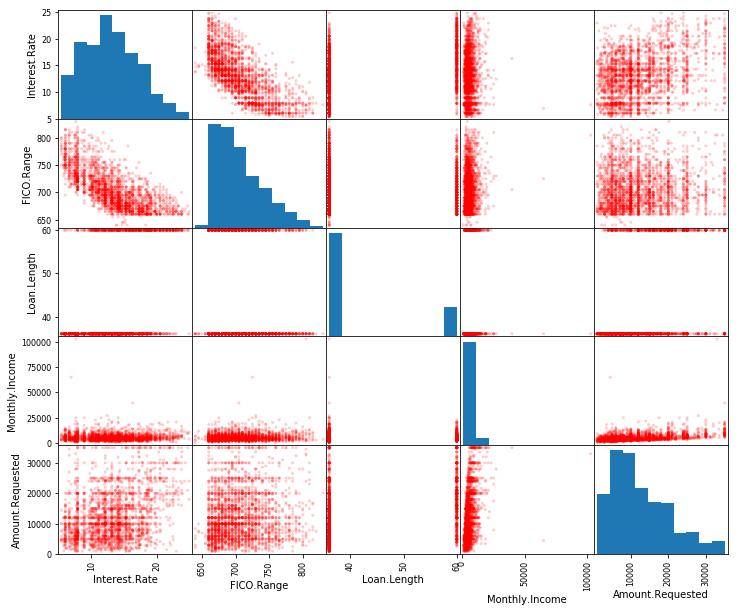

In [16]:
#scatter plot matrix
from pandas.plotting import scatter_matrix
plt.figure(figsize=(12,10))
scatter_matrix(loans_data[['Interest.Rate', 'FICO.Range', 'Loan.Length', 'Monthly.Income', 'Amount.Requested']], 
               alpha=0.2,figsize=(12,10),color='red', diagonal='hist')

In [17]:
#FICO range, amount requested and interest rate are linearly regression ralationship (Multiple 
#Linear regression)
# Interest rate will be dependent variable
# Fico range and amount of loan will be independent variables

In [18]:
#Using ordinary least square(OLS), we can find the independent variables with less RMSE error

In [33]:
import statsmodels.api as sm

In [19]:
interest_rate = loans_data['Interest.Rate']

In [20]:
loan_amt = loans_data['Amount.Requested']

In [22]:
fico_score = loans_data['FICO.Range']

In [27]:
y = np.matrix(interest_rate).transpose()

In [29]:
x1 = np.matrix(loan_amt).transpose()

x2 = np.matrix(fico_score).transpose()

In [30]:
x = np.column_stack([x1,x2])

In [41]:
x

matrix([[20000,   735],
        [19200,   715],
        [35000,   690],
        ...,
        [10000,   680],
        [ 6000,   675],
        [ 9000,   670]], dtype=int64)

In [34]:
x3 = sm.add_constant(x)

In [35]:
x3

matrix([[1.00e+00, 2.00e+04, 7.35e+02],
        [1.00e+00, 1.92e+04, 7.15e+02],
        [1.00e+00, 3.50e+04, 6.90e+02],
        ...,
        [1.00e+00, 1.00e+04, 6.80e+02],
        [1.00e+00, 6.00e+03, 6.75e+02],
        [1.00e+00, 9.00e+03, 6.70e+02]])

In [37]:
model = sm.OLS(y, x3)

In [38]:
model_fit = model.fit()

In [39]:
print('P-Values are:', model_fit.pvalues) # less than 5% is a good model

P-Values are: [0.00000000e+000 5.96972978e-203 0.00000000e+000]


In [40]:
print('R-squared values are:', model_fit.rsquared) # Value lies between +1 to -1..close to 1 is a good

R-squared values are: 0.6566326246493588
